# Classificação de Imagem

Para a classificação da imagem, utilizamos um modelo pré-trinado do site <a href="https://huggingface.co/">Hugging Face</a>, esse modelo foi desenvolvido por pesquisadores da OpenAI e pode ser encontrado <a href="https://huggingface.co/openai/clip-vit-large-patch14">aqui.</a>

Basicamente o modelo consiste na definição de tags para classificação e a IA classifica a imagem com base nessas tags, iremos utilizar quatro tags para esse exemplo, sendo elas pet, people, pet and people e pet running away.

Para melhor organização, dividimos em quatro partes, uma para importar as bibliotecas necessárias e instanciar o modelo, uma para criar uma função para a apresentação da imagem e a classificação retornada pelo modelo, uma para criar uma função para utilização do modelo, e por fim, uma seção para testar o modelo.

## Importando as dependências:

In [1]:
# importando as bibliotecas necessária para o Modelo e manipulação de imagem
from PIL import Image
import matplotlib.pyplot as plt
import requests

from transformers import CLIPProcessor, CLIPModel

# instanciando o modelo
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

C:\Users\aliss\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


## Criando funções para auxiliar na classificação e apresentação da imagem:

In [2]:
def apresenta_classifica_precissao(image, probs):

    tags = ["Pet", "People", "Pet and People", "Pet Running Away"]
    probs_simple = [probs[0][0].item(), probs[0][1].item(), probs[0][2].item(), probs[0][3].item()]

    tag =tags[probs_simple.index(max(probs_simple))]

    # exiba a imagem
    plt.imshow(image)
    plt.title(tag)
    plt.axis('off')  # desativar os eixos
    plt.show()

    print(f"Pet: {probs_simple[0]}")
    print(f"People: {probs_simple[1]}")
    print(f"Pet and People: {probs_simple[2]}")
    print(f"Pet Running Away: {probs_simple[3]}")

    return tag, probs_simple

In [3]:
def classifica_imagem(url):
    image = Image.open(url)

    # classes para classificação
    classes = ["a photo of a pet", "a photo of a people", "a photo of a pet and people", "a photo of a pet running away"]

    inputs = processor(text=classes, images=image, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

    return apresenta_classifica_precissao(image, probs)

## Testando e quantificando o tempo de execução:

In [4]:
import time

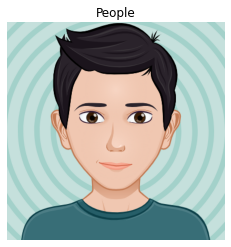

Pet: 0.05140988528728485
People: 0.9116427302360535
Pet and People: 0.03665513917803764
Pet Running Away: 0.00029232914675958455
Tempo de execução: 2.591115951538086 segundos


In [5]:
# teste 1
start_time = time.time()

classifica_imagem("C:/Users/aliss/Downloads/xavatario.png")

end_time = time.time()

# Calcule o tempo decorrido
elapsed_time = end_time - start_time

print(f"Tempo de execução: {elapsed_time} segundos")

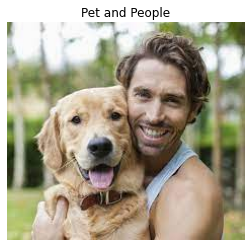

Pet: 0.10412397235631943
People: 0.004987161606550217
Pet and People: 0.887193500995636
Pet Running Away: 0.0036953226663172245
Tempo de execução: 2.0968806743621826 segundos


In [6]:
# teste 2
start_time = time.time()

classifica_imagem("C:/Users/aliss/Downloads/pet_and_people.jpg")

end_time = time.time()

# Calcule o tempo decorrido
elapsed_time = end_time - start_time

print(f"Tempo de execução: {elapsed_time} segundos")

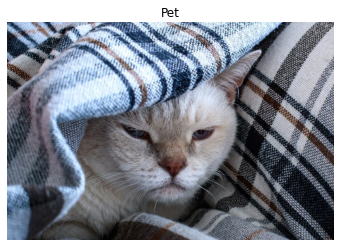

Pet: 0.960521936416626
People: 0.0070368442684412
Pet and People: 0.03172330558300018
Pet Running Away: 0.0007179175736382604
Tempo de execução: 1.9867382049560547 segundos


In [7]:
# teste 3
start_time = time.time()

classifica_imagem("C:/Users/aliss/Downloads/gato.jpg")

end_time = time.time()

# Calcule o tempo decorrido
elapsed_time = end_time - start_time

print(f"Tempo de execução: {elapsed_time} segundos")

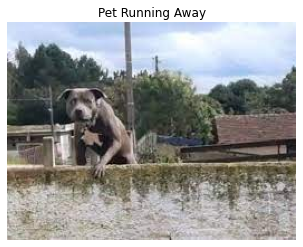

Pet: 0.3964489698410034
People: 0.00531005347147584
Pet and People: 0.1245584711432457
Pet Running Away: 0.4736824929714203
Tempo de execução: 1.9814245700836182 segundos


In [8]:
# teste 4
start_time = time.time()

classifica_imagem("C:/Users/aliss/Downloads/fugindo2.jpg")

end_time = time.time()

# Calcule o tempo decorrido
elapsed_time = end_time - start_time

print(f"Tempo de execução: {elapsed_time} segundos")

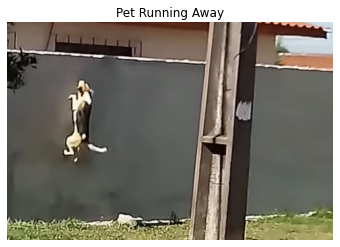

Pet: 0.03140012174844742
People: 0.0009144760551862419
Pet and People: 0.049314409494400024
Pet Running Away: 0.9183709621429443
Tempo de execução: 1.9436259269714355 segundos


In [9]:
# teste 5
start_time = time.time()

classifica_imagem("C:/Users/aliss/Downloads/fugindo3.jpg")

end_time = time.time()

# Calcule o tempo decorrido
elapsed_time = end_time - start_time

print(f"Tempo de execução: {elapsed_time} segundos")